The goal of this project is to describe the variation in the different types of customers who interact with wholesale distributors. Doing so will equip distributors with insight on how to best structure their delivery service to meet each customer's needs.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from mpl_toolkits.mplot3d import Axes3D

#from scipy.cluster.hierarchy import linkage,dendogram

print('numpy version: ', np.__version__)
print('pandas version: ', pd.__version__)
print('seaborn version: ', sns.__version__)

numpy version:  1.20.1
pandas version:  1.2.2
seaborn version:  0.11.0


In [4]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style('whitegrid')
sns.color_palette('dark')
plt.style.use('fivethirtyeight')

## Load Data

In [5]:
data = pd.read_csv('marketplace_customers.csv')
data.head()

,CustomerID,Age,Annual Spending (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [6]:
data = data.dropna()
data.head()

,CustomerID,Age,Annual Spending (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


## Data Understanding

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Spending (k$)    200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 7.8 KB


## Data Pre-processing

#### Null & Missing Values

In [10]:
data.head()

,CustomerID,Age,Annual Spending (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [20]:
data_null = data.isnull().sum().reset_index()
data_null.columns = ['feature','missing_value']
#data_null['percentage'] = round((data_null['missing_value']/len(data))*100,2)
#data_null = data_null.sort_values('percentage', ascending=False).reset_index(drop=True)
#data_null = data_null[data_null['percentage']>0]
data_null

,feature,missing_value
0,CustomerID,0
1,Age,0
2,Annual Spending (k$),0
3,Spending Score (1-100),0


#### Duplicate Values

In [18]:
data.duplicated().sum()

0

#### Statistical Summary

In [19]:
data.describe()

,CustomerID,Age,Annual Spending (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [21]:
data = data.drop('CustomerID', axis=1)

#### Numeric Distribution & Outlier

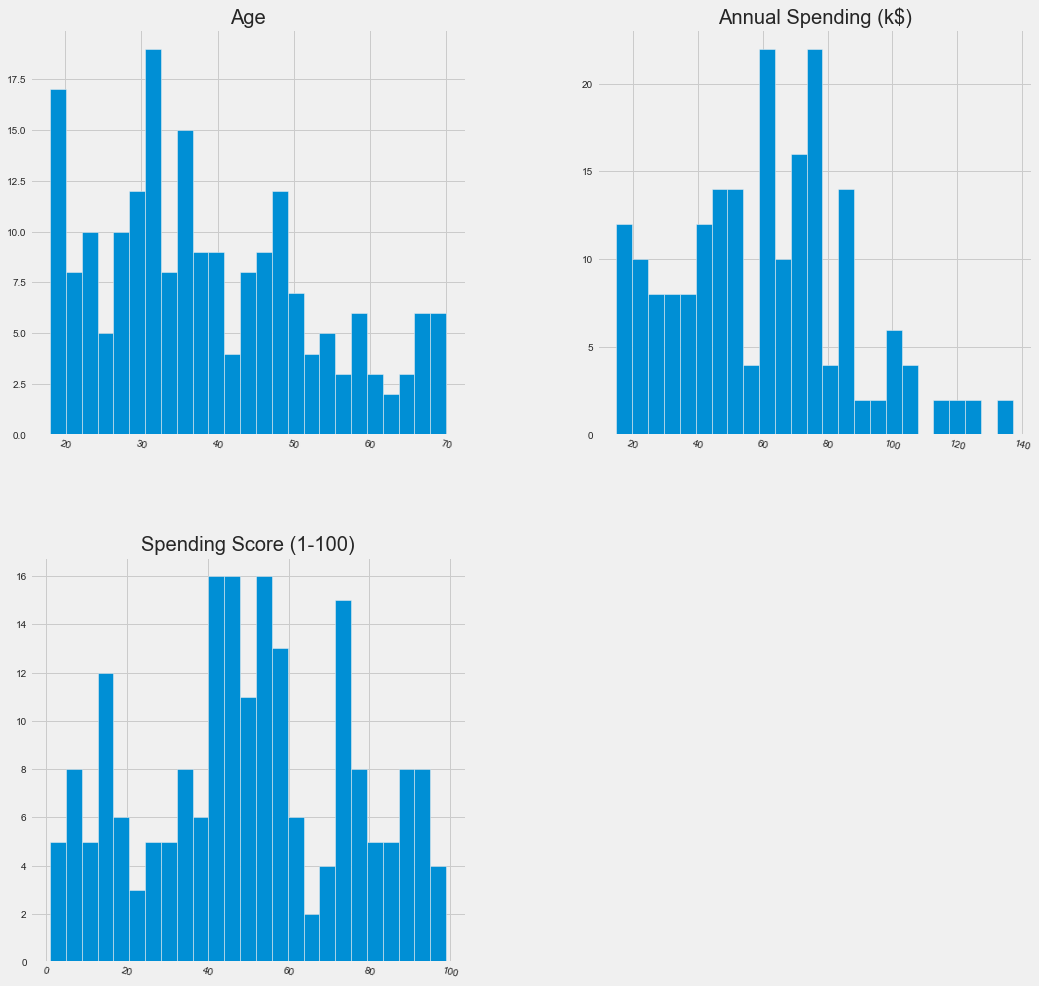

In [22]:
h = data.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)

In [23]:
feat_num = list(data)

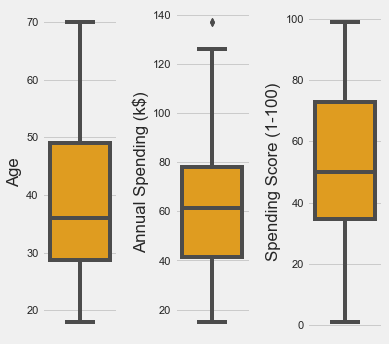

In [27]:
plt.figure(figsize=(13, 5))
for i in range(0, len(feat_num)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=data[feat_num[i]],color='orange',orient='v')
    plt.tight_layout()

#### Correlation Matrix

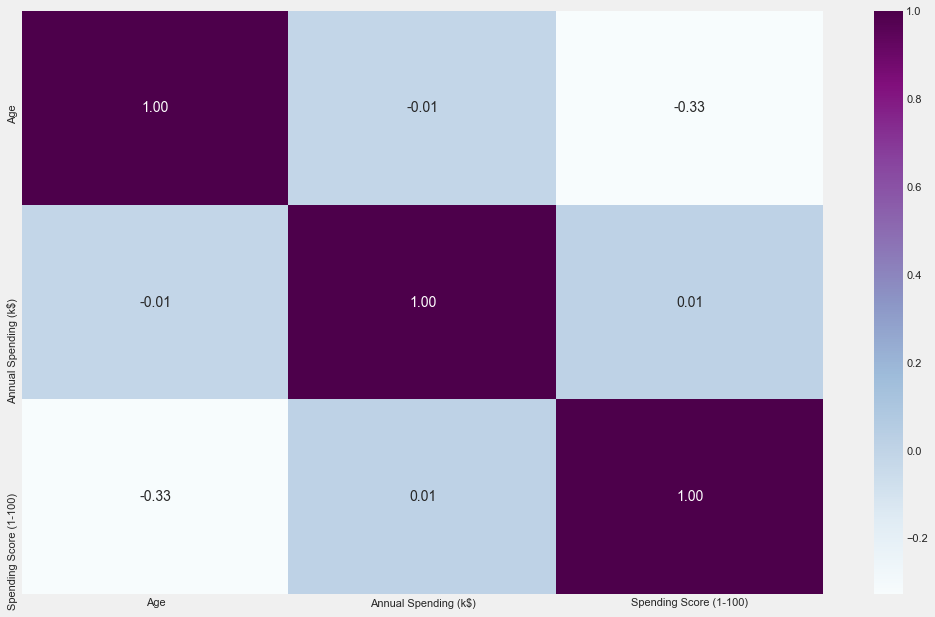

In [30]:
corr_= data.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt=".2f", cmap="BuPu")
plt.show()

#### Scaling

In [31]:
sc_data = StandardScaler()
data_std = sc_data.fit_transform(data.astype(float))

## Modelling

In [34]:
ac = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward").fit(data_std)

In [35]:
df_data_std = pd.DataFrame(data=data_std, columns=list(data))

In [36]:
df_data_std['clusters'] = ac.labels_
data['clusters'] = ac.labels_

## Evaluasi

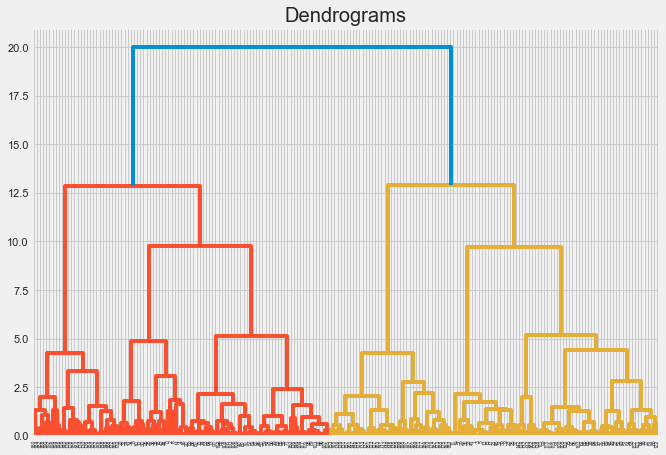

In [37]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_std, method='ward'))

## Insight

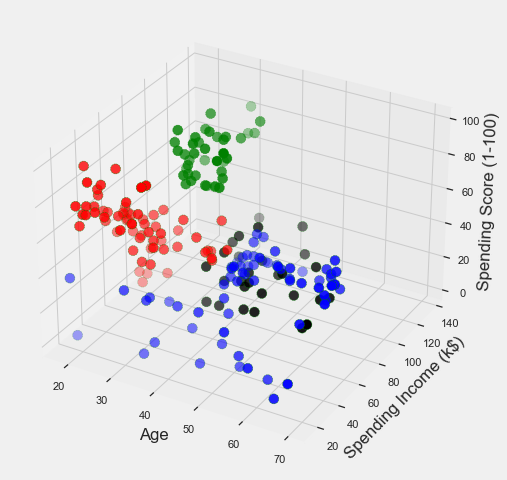

In [38]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[data.clusters == 0], data["Annual Spending (k$)"][data.clusters == 0], data["Spending Score (1-100)"][data.clusters == 0], c='blue', s=100, edgecolor='green',linestyle='--')
ax.scatter(data.Age[data.clusters == 1], data["Annual Spending (k$)"][data.clusters == 1], data["Spending Score (1-100)"][data.clusters == 1], c='red', s=100, edgecolor='green',linestyle='--')
ax.scatter(data.Age[data.clusters == 2], data["Annual Spending (k$)"][data.clusters == 2], data["Spending Score (1-100)"][data.clusters == 2], c='green', s=100, edgecolor='green',linestyle='--')
ax.scatter(data.Age[data.clusters == 3], data["Annual Spending (k$)"][data.clusters == 3], data["Spending Score (1-100)"][data.clusters == 3], c='black', s=100, edgecolor='green',linestyle='--')

plt.xlabel("Age")
plt.ylabel("Spending Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

#### 3D to 2D visualization

In [39]:
pca = PCA(n_components=2)
pca.fit(data_std)
pcs = pca.transform(data_std)
data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = data['clusters']
data_pca.head()

,PC 1,PC 2,clusters
0,-0.615720,-1.763481,0
1,-1.665793,-1.820747,1
2,0.337862,-1.674799,0
3,-1.456573,-1.772430,1
4,-0.038465,-1.662740,0


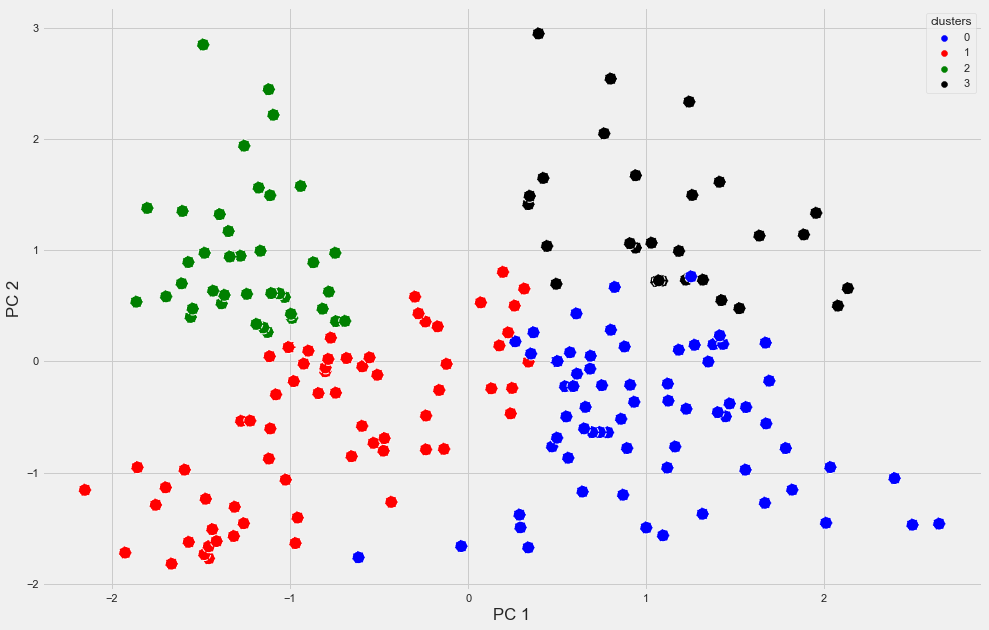

In [41]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    linestyle='--',
    data=data_pca,
    palette=['blue','red','green','black'],
    s=160,
    ax=ax)

plt.show()

In [42]:
display(data.groupby('clusters').agg(['mean','median']))

Age        Annual Spending (k$)        Spending Score (1-100)  \
               mean median                 mean median                   mean   
clusters                                                                        
0         52.432836   51.0            45.597015     47              39.134328   
1         26.560606   24.5            47.363636     48              56.787879   
2         32.692308   32.0            86.538462     79              82.128205   
3         43.892857   43.5            91.285714     87              16.678571   

                 
         median  
clusters         
0            43  
1            55  
2            83  
3            16